# Name: Sarthak Bose

# TSF Internship Task #6: Prediction using Decision Tree Algorithm

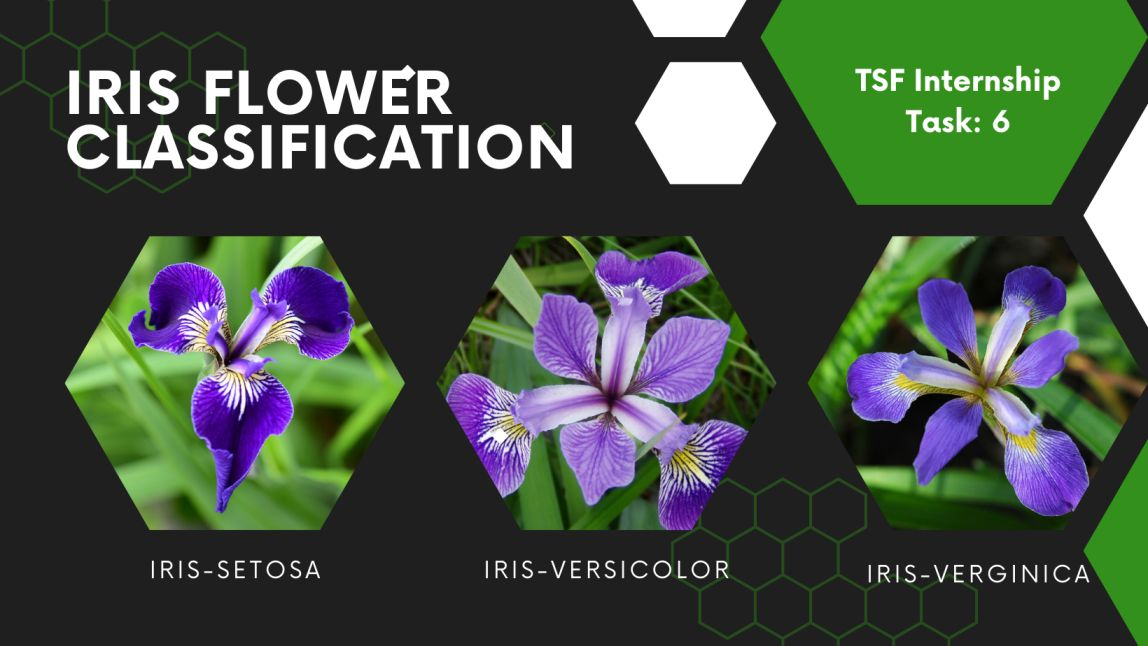

**Purpose:** The objective of the project is to create a decision tree classifier, so that if we feed new data to the model, it will be able to predict the right class accordingly. So, it is clear that the problem in hand is a classification problem.

**Language Used:** Python 3

**Tools:** Kaggle, Github

**Approach:** First, we will undersatnd the dataset, clean the data and then use data visualization techniques to visually identify the distinctive features and how they are related with the respective class. Then we will create a decision tree model for future prediction purposes.

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Understanding the Dataset

In [2]:
# Loading data

df = pd.read_csv('/kaggle/input/task-6/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Summary statistics of the Dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [5]:
# Finding all the unique species in the dataset

unique_species = df[['Id','Species']].groupby('Species').count()
unique_species

,Id
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


**Observation:**

The dataset has three unique species and each species has 50 entries in the dataset.

# Data Cleaning

In [6]:
# Dropping duplicates if any

df.drop_duplicates()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# Searching for null values

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Obseravtion:**

There is no null values in the dataset.

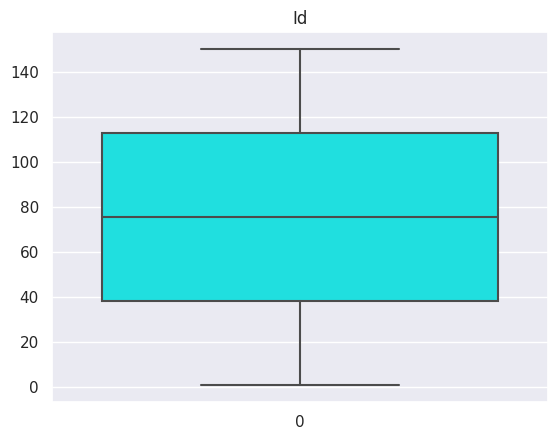

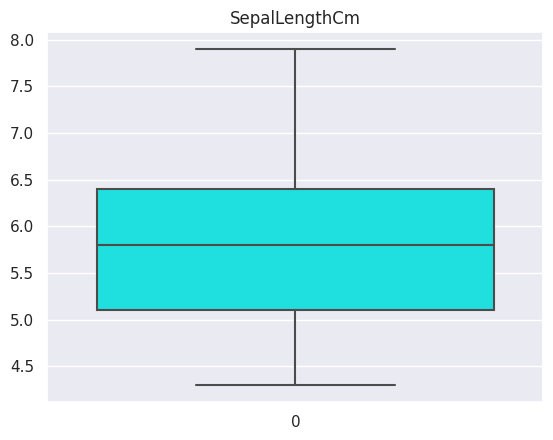

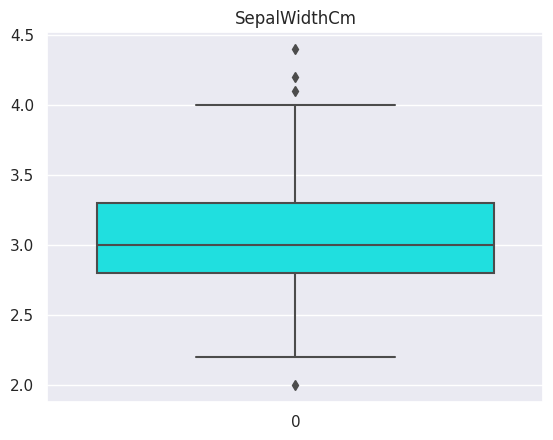

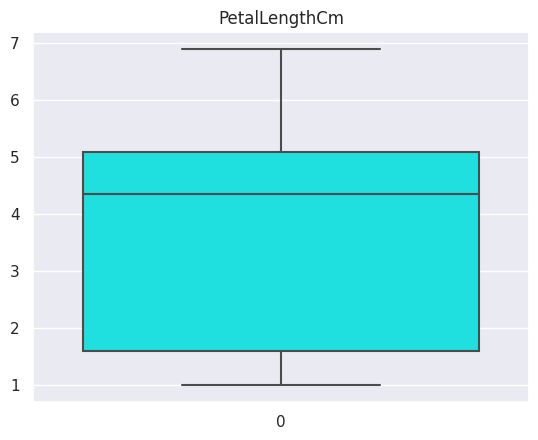

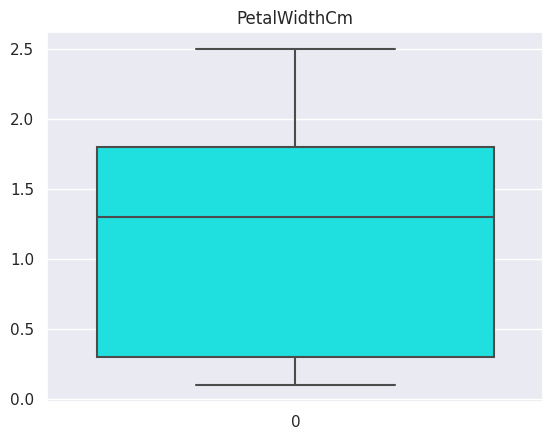

In [8]:
# Creating boxplots to show outliers in each numerical column

def boxplot(col):
    sns.boxplot(df[col], color = 'aqua')
    plt.title(col)
    plt.show()
    
for i in list(df.select_dtypes(exclude = ['object']).columns)[0:]:
    boxplot(i)

**Observation:**

Most of the columns don't contain outliers.

# Data Visualization

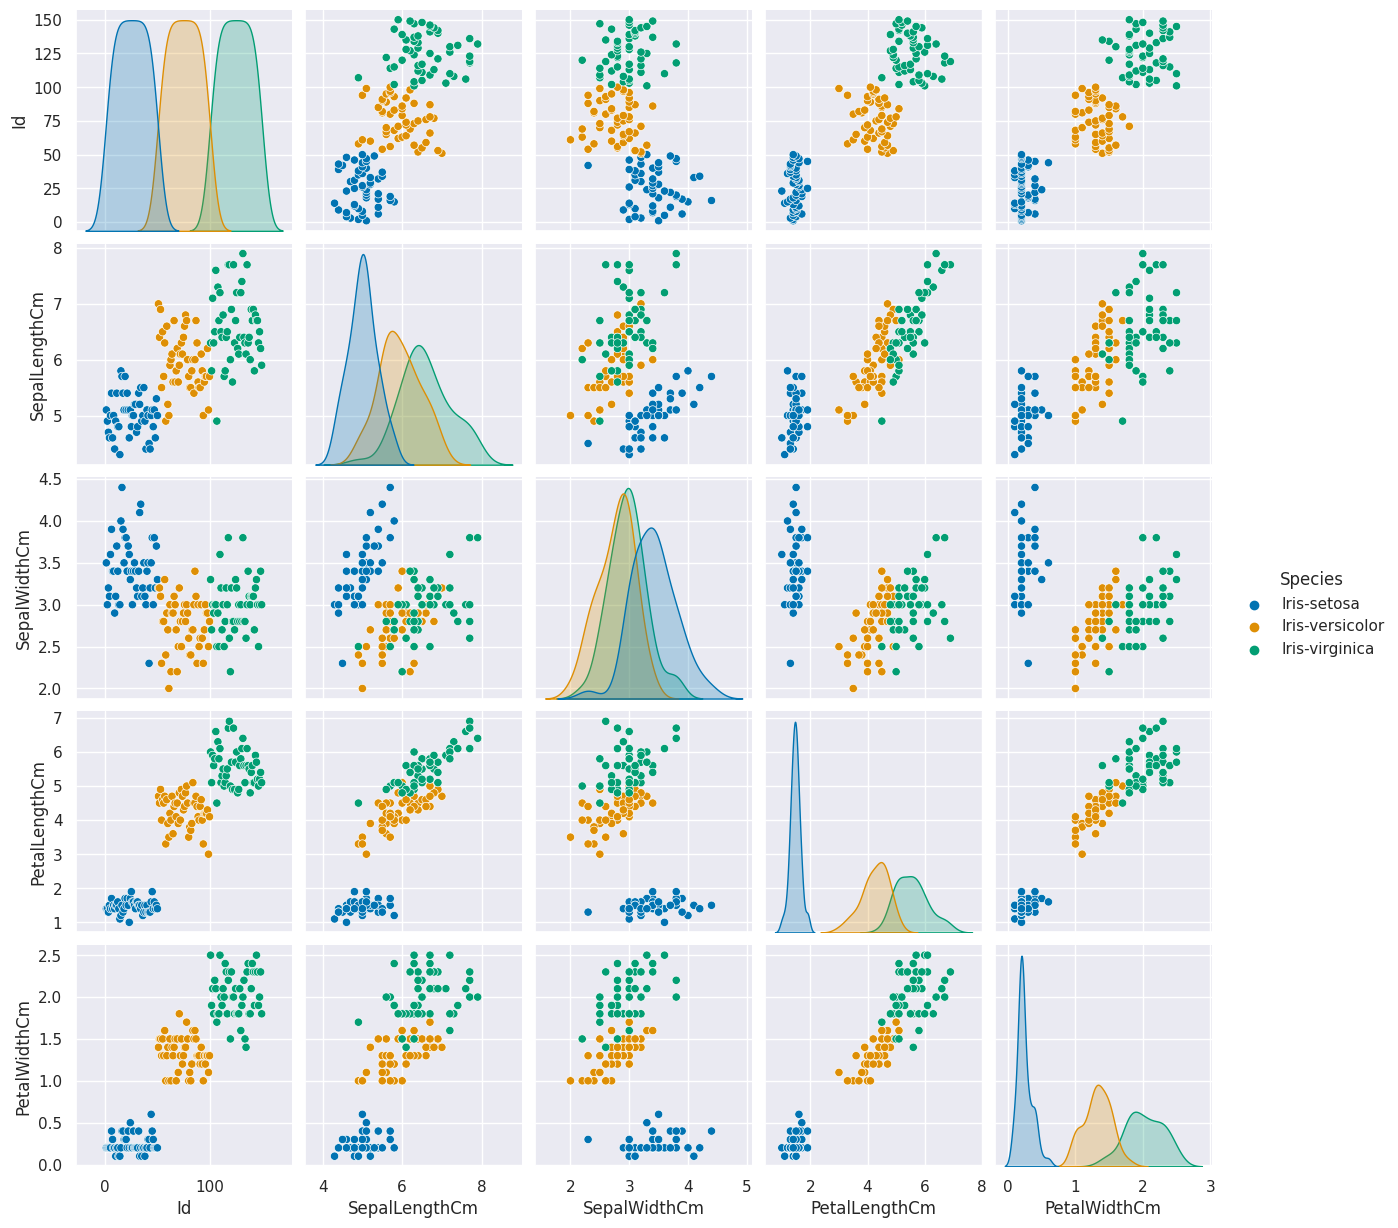

In [9]:
# Scatterplot of the numerical variables

sns.pairplot(df, hue = 'Species', palette = 'colorblind')

**Observation:**

As we can see, the scatter plot of 'PetalLengthCm' and 'PetalWidthCm' provides a good classification visual.

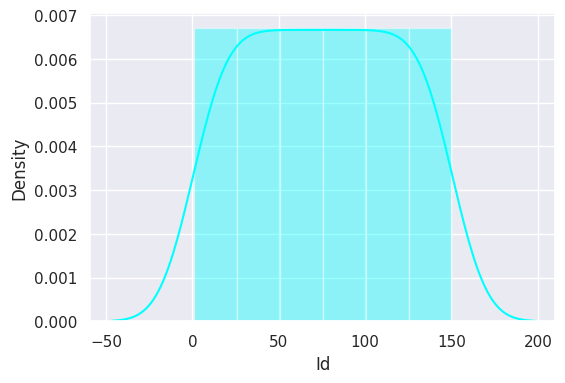

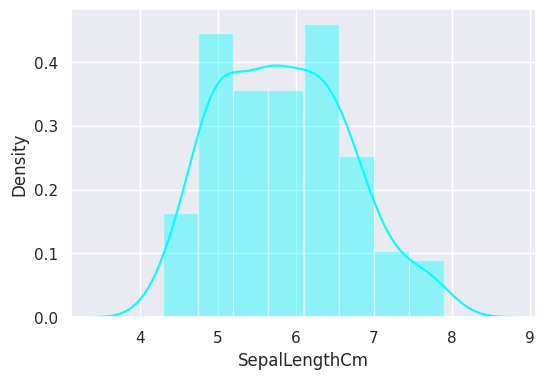

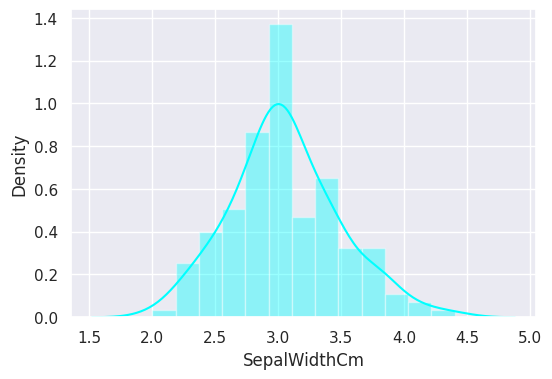

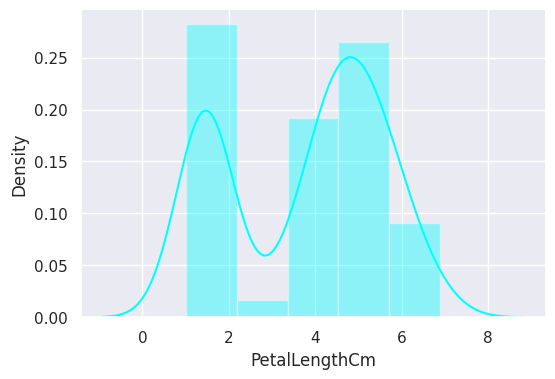

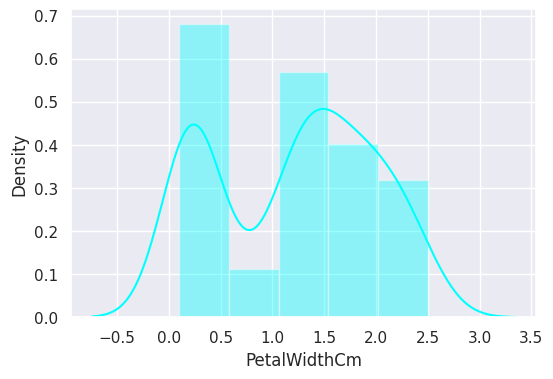

In [10]:
# Distibutions of the numerical variables:

def distplot(col):
    plt.figure(figsize=(6,4))
    sns.distplot(df[col], color = 'aqua')
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    distplot(i)

**Observation:**

Except for Sepal Width, none of the variables are distributed normally. Since decision tree regressor model does not require the assumption of normality, we can move forward without normalization.

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

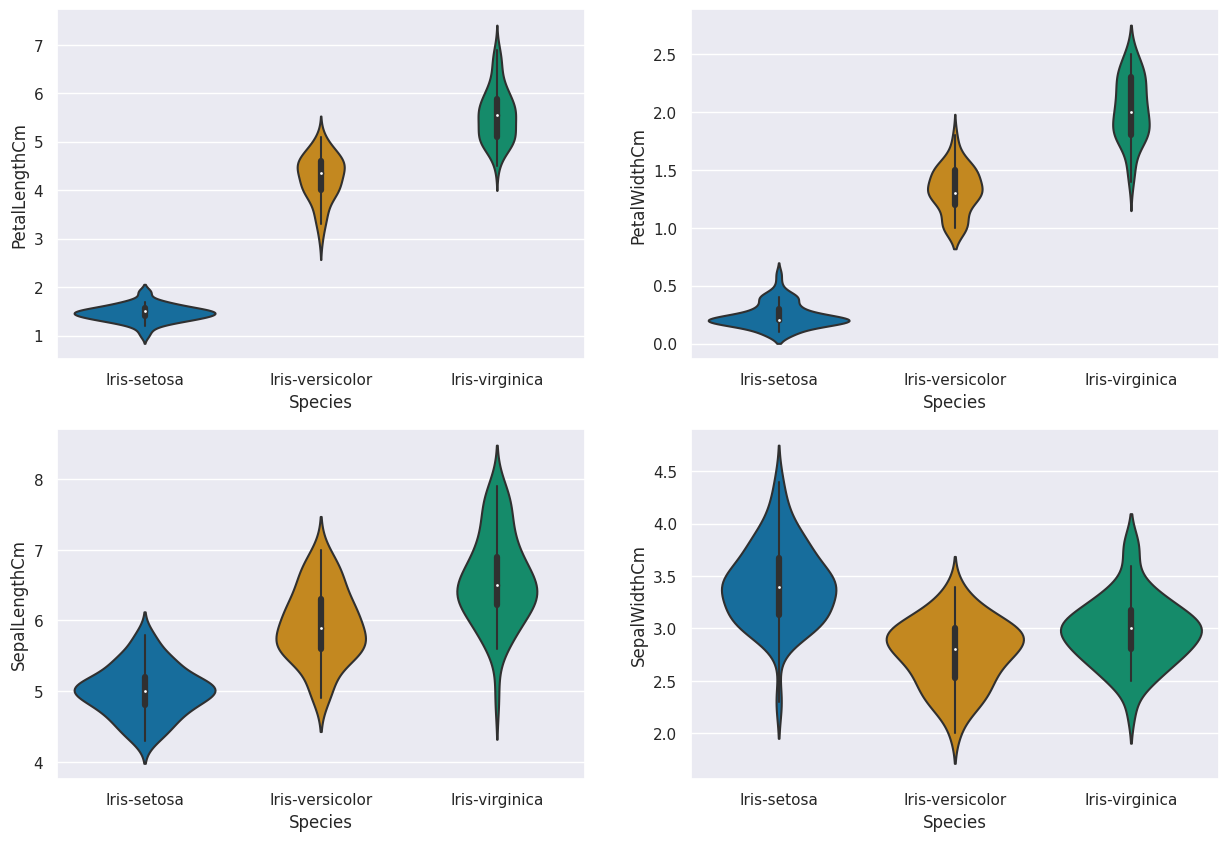

In [11]:
# Variation of length and width according to species

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df, palette = 'colorblind')
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df, palette = 'colorblind')
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df, palette = 'colorblind')
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df, palette = 'colorblind')

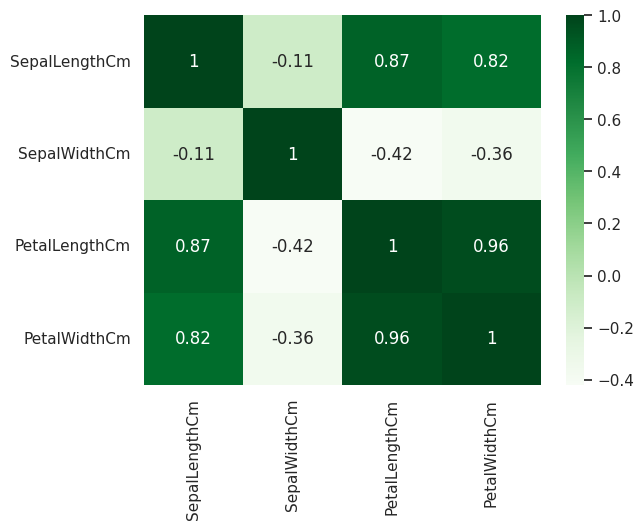

In [12]:
# Finding correlation

corr = df[df.columns[1:5]].corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)
plt.show()

**Observation:**

The deeper the green colour, the higher the correlation. Some of the variables are higly correlated. However, decision tree model does not get affected by multi-collinearity. So, it we can move forwars.

# Decision Tree Model

Here we have to convert the column, "Species" into a clomn with numerical values.

In [13]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Species'] = le.fit_transform(df['Species'])

In [14]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [15]:
# Selecting dependent and independent variables

# Dependent Variable
y = df.Species

# Independent Variables
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [16]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Train-Test-Split

In [17]:
# train and test dataset. Splitting train and test data in 80:20 ratio

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [18]:
train_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


## Our Model

In [19]:
from sklearn.tree import DecisionTreeRegressor

iris_model = DecisionTreeRegressor(random_state = 42)
iris_model.fit(train_x, train_y)
predictions = iris_model.predict(test_x)

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\nsquared_error = 0.658\nsamples = 120\nvalue = 0.992'),
 Text(0.23076923076923078, 0.7857142857142857, 'squared_error = 0.0\nsamples = 40\nvalue = 0.0'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\nsquared_error = 0.25\nsamples = 80\nvalue = 1.488'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\nsquared_error = 0.026\nsamples = 37\nvalue = 1.027'),
 Text(0.07692307692307693, 0.5, 'squared_error = 0.0\nsamples = 36\nvalue = 1.0'),
 Text(0.23076923076923078, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\nsquared_error = 0.103\nsamples = 43\nvalue = 1.884'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\nsquared_error = 0.25\nsamples = 8\nvalue = 1.5'),
 Text(0.3076923076923077, 0.35714285714285715, 'squared_error = 0.0\nsamples = 2\nvalue = 1.0'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\nsquared_error = 0.

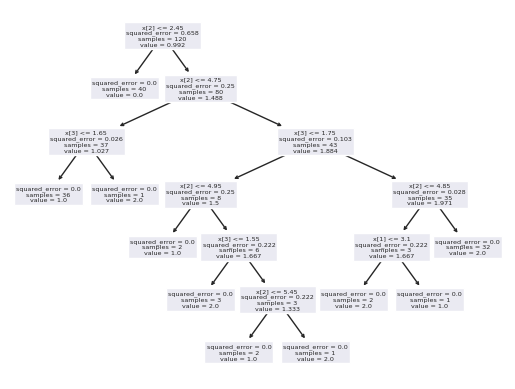

In [20]:
# Visualizing the decision tree

from sklearn import tree
tree.plot_tree(iris_model)

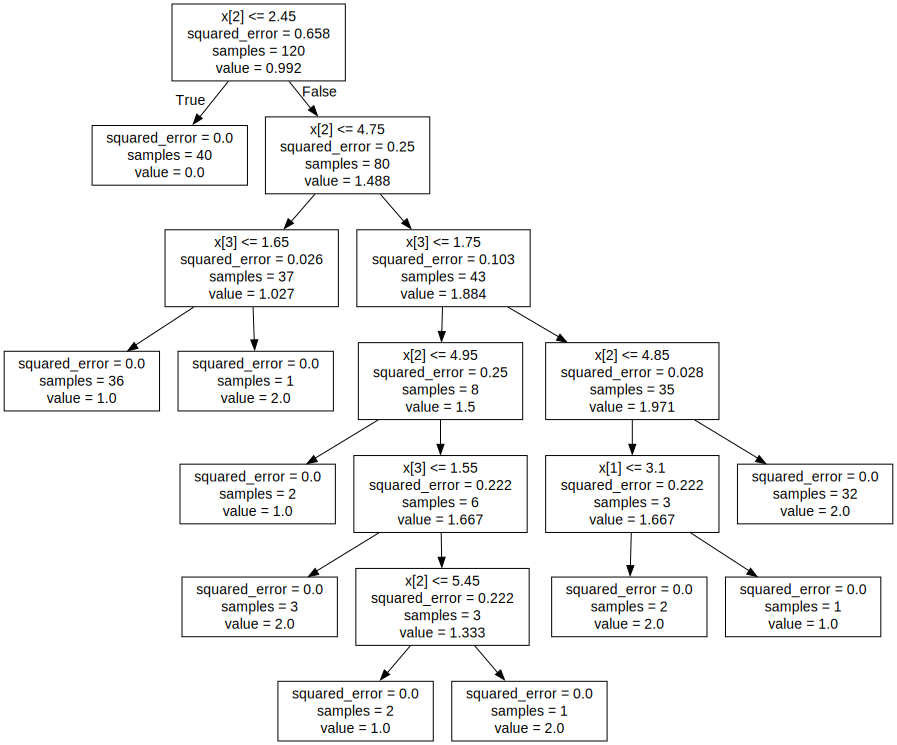

In [21]:
# Producing a better visualization

import graphviz 
dot_data = tree.export_graphviz(iris_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [22]:
# Accuracy of the model

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)
print("Accuracy Score:", accuracy*100, "%")

Accuracy Score: 100.0 %


### As we can see, the accuracy of the model is very high. So, the model has a great predictive power.

# Thank You